<a href="https://colab.research.google.com/github/junheecho-zz/play2021/blob/master/Training_Grape_Type_Classifier_using_fastai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference

1. [fastai tutorial](https://docs.fast.ai/tutorial.vision.html)

# grape type clasifier using fastai2

## 1) Download grape dataset

In [5]:
%%capture
!rm -rf grape_dataset
!wget https://www.dropbox.com/s/cdle49xzq3kcwnq/grape-dataset.tar.gz?dl=0 -O grape_dataset.tar.gz
!tar xvfz grape_dataset.tar.gz
# Load the TensorBoard notebook extension
%load_ext tensorboard

## 2) Training part using Keras and pre-trained model

### Set Training Parameter

### Verifying image loading test

In [10]:
from PIL import Image
import tqdm

def get_failed_images(root_dir):
  class_names = os.listdir(root_dir)
  failed_files = []
  for category in class_names:
    files = [os.path.join(root_dir, category, file) for file in os.listdir(os.path.join(root_dir, category))]
    for file in tqdm.tqdm(files):
      try:
        #print ('.', end='')
        Image.open(file).load()
      except Exception as ex:
        #print ('fail', file)
        failed_files += [file]
  print ('done')
  return failed_files

# fail /content/grape-dataset/shine muscat grape/0043.jpg

#dataset_dir = '/content/grape-dataset'
failed_files = get_failed_images(dataset_dir)

print ('\nfailed_files', failed_files)
# rename failed files 
for file in failed_files:
  src = file
  dest = src[:-4] + '.error'
  print ('reanme', src, 'to', dest)
  os.rename(src, dest)

100%|██████████| 289/289 [00:08<00:00, 35.88it/s]

done

failed_files ['/content/grape-dataset/shine muscat grape/0043.jpg']
reanme /content/grape-dataset/shine muscat grape/0043.jpg to /content/grape-dataset/shine muscat grape/0043.error


Found 747 images belonging to 4 classes.
Found 184 images belonging to 4 classes.


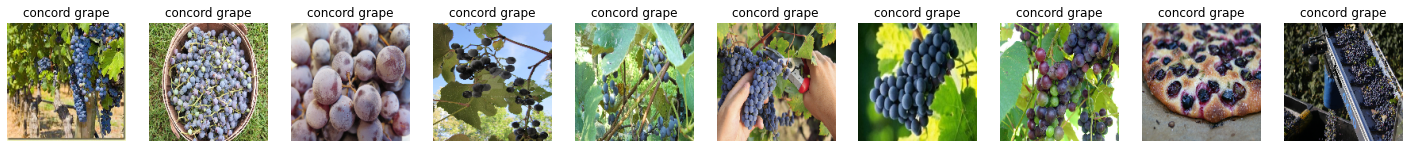

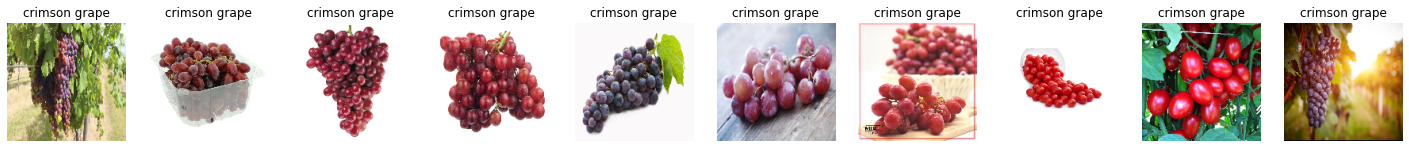

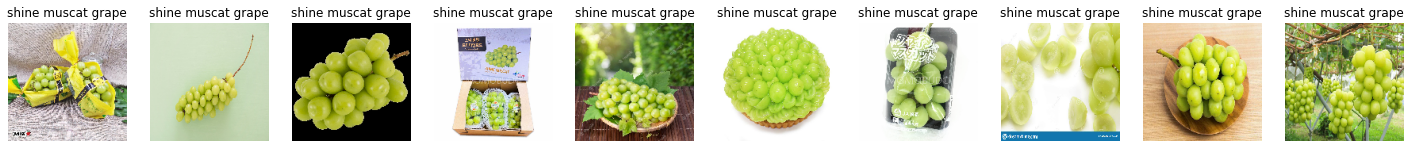

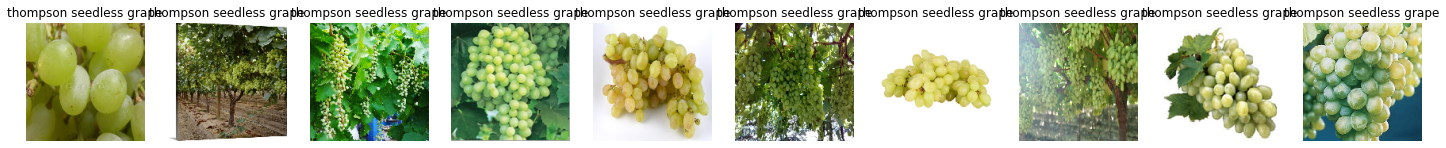

In [ ]:
## to image data generator
 
# See also https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
datagen_train = ImageDataGenerator(
    preprocessing_function=preprocess_input, # image preprocessing function
    rotation_range=10,                        # randomly rotate images in the range
    zoom_range=0.1,                          # Randomly zoom image
    width_shift_range=0.1,                   # randomly shift images horizontally
    height_shift_range=0.1,                  # randomly shift images vertically
    horizontal_flip=True,                    # randomly flip images horizontally
    vertical_flip=False,      # randomly flip images vertically
    validation_split=0.2
)
  
train_generator = datagen_train.flow_from_directory(
    trainingset_dir, 
    subset='training',
    target_size=(W, H), class_mode="categorical", batch_size=batch_size, seed=seed)
 
validation_generator = datagen_train.flow_from_directory(
    trainingset_dir, 
    subset='validation',
    shuffle=False,
    target_size=(W, H), class_mode="categorical", batch_size=batch_size, seed=seed)
 
# Visualize training sample
for class_name in class_names:
    n_cols = 10 # samples per class
    fig, axs = plt.subplots(ncols=n_cols, figsize=(25, 3))
    directory = trainingset_dir + '/' + class_name
    assert os.path.exists(directory)
    image_files = glob.glob(directory + '/*.jpg')[:n_cols]
 
    for i in range(n_cols):
        image_file = image_files[i]
        image = load_img(image_file, target_size=(150, 150))
        axs[i].imshow(np.uint8(image))
        axs[i].axis('off')
        axs[i].set_title(class_name)
 
    plt.show()

### Training (Transfer learning)

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.4 MB/s 
     |████████████████████████████████| 186 kB 51.2 MB/s 
     |████████████████████████████████| 1.2 MB 33.3 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 51 kB 300 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
import fastai
fastai.__version__

'2.5.2'

In [4]:
import numpy as np
from fastai.vision import *
from fastai import *

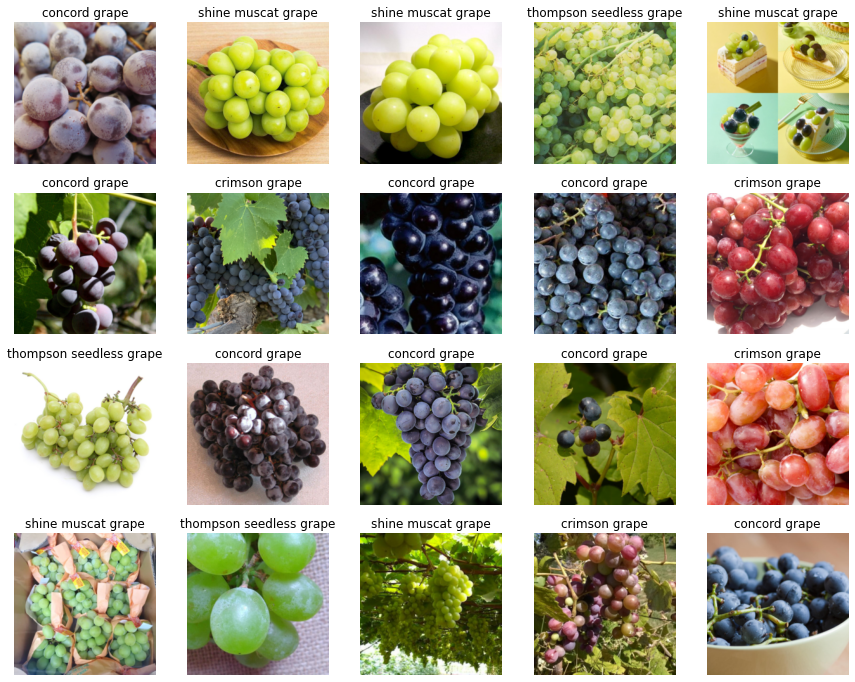

In [19]:
tfms = aug_transforms(flip_vert=False)
path = './grape-dataset'
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2, item_tfms=Resize(224))
dls.show_batch(max_n=20)

In [20]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


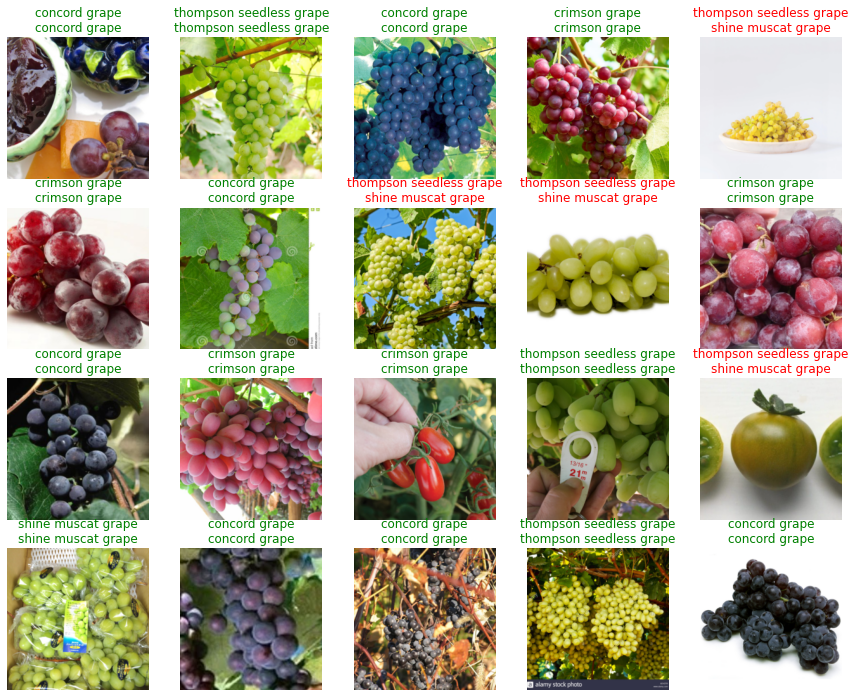

In [22]:
learn.show_results(max_n=20)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

SuggestedLRs(valley=5.248074739938602e-05)

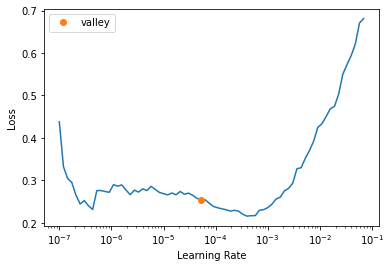

In [23]:
learn.lr_find()

In [24]:
learn.fine_tune(2, 5e-05)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


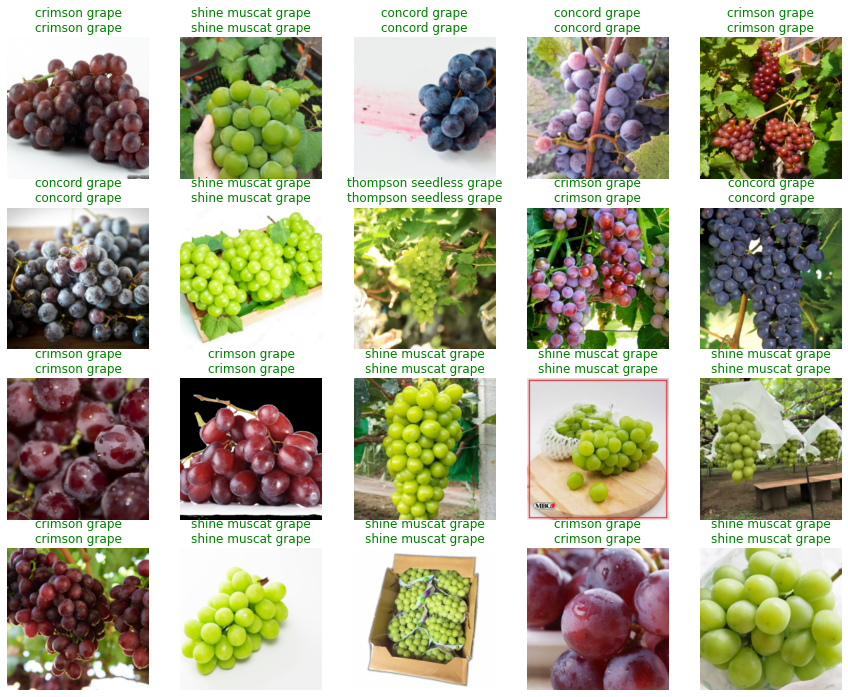

In [25]:
learn.show_results(max_n=20)

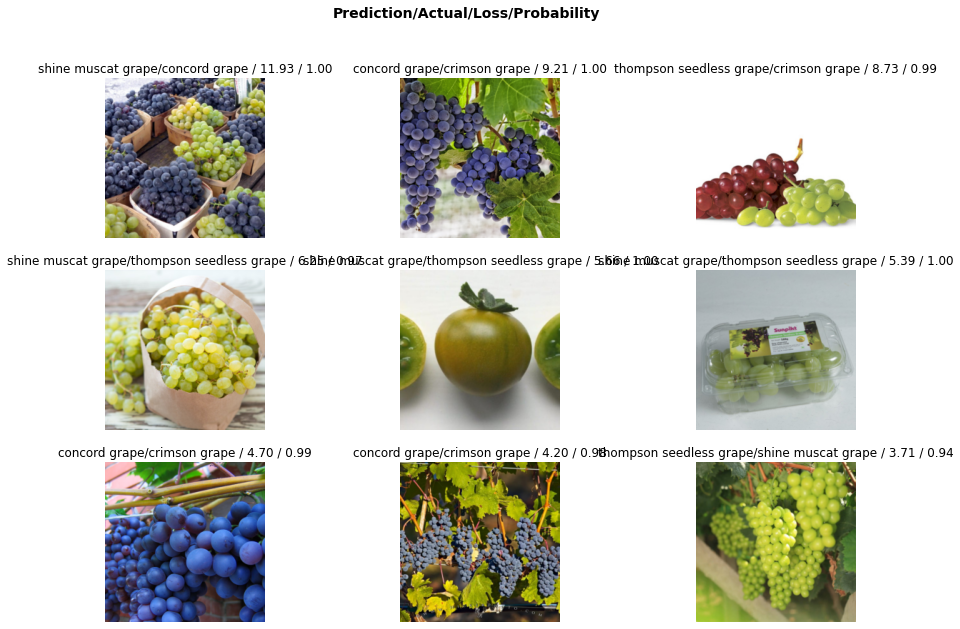

In [26]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))